3.1 Warming Up Exercises - Basic Inspection and Exploration:

Problem 1 - Data Read, Write and Inspect:

Complete all following Task:

• Dataset for the Task: "bank.csv"

---



1. Load the provided dataset and import in pandas DataFrame.

2. Check info of the DataFrame and identify following:

(a) columns with dtypes=object

(b) unique values of those columns.

(c) check for the total number of null values in each column.

3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”

4. Read ”banknumericdata.csv” and Find the summary statistics.

In [ ]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

In [ ]:
import pandas as pd

# 1. Load dataset
df = pd.read_csv("bank.csv")

# 2. Check info and identify
print(df.info())

# (a) columns with object type
obj_cols = df.select_dtypes(include='object').columns
print("Object columns are:", obj_cols)

# (b) unique values of object columns
for col in obj_cols:
    print("Unique values in", col, ":")
    print(df[col].unique())
    print()

# (c) total null values in each column
print("Null values in each column:")
print(df.isnull().sum())

# 3. Drop all object columns and store in new DataFrame
bank_numeric = df.select_dtypes(exclude='object')
print(bank_numeric.head())

# save to csv
bank_numeric.to_csv("banknumericdata.csv", index=False)

# 4. Read the new CSV and find summary statistics
bank_num_df = pd.read_csv("banknumericdata.csv")
print("Summary statistics:")
print(bank_num_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
Object columns are: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'conta

**Problem 2 - Data Imputations:**
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"

---


1. Load the provided dataset and import in pandas DataFrame.

2. Check info of the DataFrame and identify column with missing (null) values.

3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.

4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [ ]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

Saving medical_students_dataset.csv to medical_students_dataset.csv


In [ ]:
# 1. Load dataset
df = pd.read_csv("medical_students_dataset.csv")

# 2. Check info and find missing values
print(df.info())
print("Total null values in each column:")
print(df.isnull().sum())

# 3. Data imputation
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].mean(), inplace=True)

# Categorical column: fill with mode (most frequent value)
if 'City' in df.columns:
    df['City'].fillna(df['City'].mode()[0], inplace=True)

# Check if missing values are handled
print("Null values after imputation:")
print(df.isnull().sum())

# 4. Check for duplicates and remove them
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicates if any
df.drop_duplicates(inplace=True)
print("Number of duplicate rows after removing:", df.duplicated().sum())

# Optional: show final dataframe head
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None
Total null values in each column:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight     

/tmp/ipython-input-2201127199.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


Number of duplicate rows: 7644
Number of duplicate rows after removing: 0
   Student ID        Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.000000  Female  161.777924  72.354947          O  27.645835   
1         2.0  26.021561    Male  152.069157  47.630941          B        NaN   
2         3.0  32.000000  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.000000    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.000000  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No

**3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Dataset Used: "titanic.csv"**

**Problem - 1:**
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

---



In [ ]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [ ]:
df = pd.read_csv("Titanic-Dataset.csv")

# Create subset for specific columns
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Retain only first-class passengers (Pclass == 1)
first_class_df = subset_df[subset_df['Pclass'] == 1]

# Calculate statistics for 'Fare' column
mean_fare = first_class_df['Fare'].mean()
median_fare = first_class_df['Fare'].median()
max_fare = first_class_df['Fare'].max()
min_fare = first_class_df['Fare'].min()

print("Mean Fare:", mean_fare)
print("Median Fare:", median_fare)
print("Maximum Fare:", max_fare)
print("Minimum Fare:", min_fare)


Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


**Problem - 2:**
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

---



In [ ]:
df = pd.read_csv("Titanic-Dataset.csv")

# Subset the required columns
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Keep only first-class passengers
first_class_df = subset_df[subset_df['Pclass'] == 1]

# Count null values in 'Age'
null_age_count = first_class_df['Age'].isnull().sum()
print("Number of null values in 'Age':", null_age_count)

# Drop rows where 'Age' is null
first_class_df = first_class_df.dropna(subset=['Age'])

# Check after dropping
print("Data after dropping null 'Age' values:")
print(first_class_df.head())


Number of null values in 'Age': 30
Data after dropping null 'Age' values:
                                                 Name  Pclass     Sex   Age  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                             McCarthy, Mr. Timothy J       1    male  54.0   
11                           Bonnell, Miss. Elizabeth       1  female  58.0   
23                       Sloper, Mr. William Thompson       1    male  28.0   

       Fare  Survived  
1   71.2833         1  
3   53.1000         1  
6   51.8625         0  
11  26.5500         1  
23  35.5000         1  


**Problem - 3:**

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg

• ’Q’ for Queenstown

• ’S’ for Southampton

Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

---



In [ ]:
df = pd.read_csv("Titanic-Dataset.csv")

# 1. One-hot encode the 'Embarked' column
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

# 2. Add the new columns to the original DataFrame
df = pd.concat([df, embarked_dummies], axis=1)

# 3. Drop the original 'Embarked' column
df.drop('Embarked', axis=1, inplace=True)

# 4. Print first few rows to check
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


**Problem - 4:**

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

---



Mean survival rates by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


/tmp/ipython-input-988969601.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values, palette="pastel")


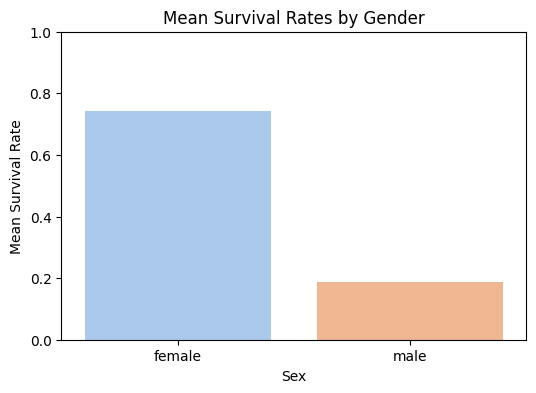

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Titanic-Dataset.csv")

# Calculate mean survival rates by 'Sex'
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print("Mean survival rates by Sex:")
print(survival_by_sex)

# Visualize survival distribution by gender
plt.figure(figsize=(6,4))
sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values, palette="pastel")
plt.title("Mean Survival Rates by Gender")
plt.ylabel("Mean Survival Rate")
plt.xlabel("Sex")
plt.ylim(0,1)
plt.show()

**Problem - 5:**

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

---



      Sex Embarked  Survived
0  female        C  0.876712
1  female        Q  0.750000
2  female        S  0.689655
3    male        C  0.305263
4    male        Q  0.073171
5    male        S  0.174603


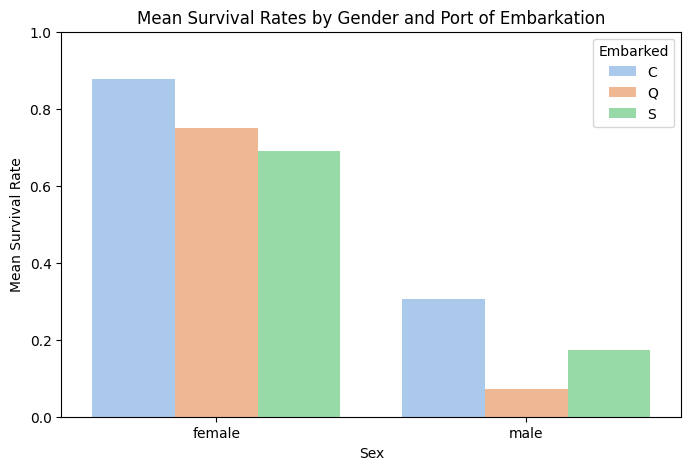

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Drop rows with missing 'Embarked' values for clean visualization
df = df.dropna(subset=['Embarked'])

# Group by 'Sex' and 'Embarked' and calculate mean survival
survival_by_sex_embarked = df.groupby(['Sex', 'Embarked'])['Survived'].mean().reset_index()
print(survival_by_sex_embarked)

# Visualize survival by gender and port of embarkation
plt.figure(figsize=(8,5))
sns.barplot(data=survival_by_sex_embarked, x='Sex', y='Survived', hue='Embarked', palette='pastel')
plt.title("Mean Survival Rates by Gender and Port of Embarkation")
plt.ylabel("Mean Survival Rate")
plt.ylim(0,1)
plt.show()

**Problem - 6{Optional}:**

Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.

---



/tmp/ipython-input-364174795.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_class = df.groupby(['Pclass','AgeGroup'])['Survived'].mean().reset_index()


    Pclass AgeGroup  Survived
0        1       Q1  0.809524
1        1       Q2  0.761905
2        1       Q3  0.666667
3        1       Q4  0.777778
4        1       Q5  0.506667
5        2       Q1  0.742857
6        2       Q2  0.400000
7        2       Q3  0.416667
8        2       Q4  0.461538
9        2       Q5  0.363636
10       3       Q1  0.333333
11       3       Q2  0.197674
12       3       Q3  0.283582
13       3       Q4  0.166667
14       3       Q5  0.088235


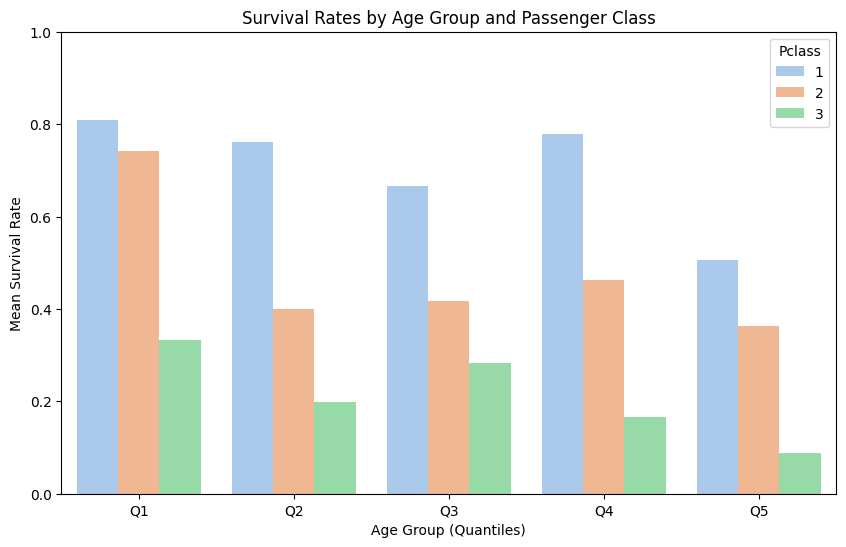

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Titanic-Dataset.csv")

# Drop rows with missing 'Age'
df = df.dropna(subset=['Age'])

# Create 5 age groups using quantiles
df['AgeGroup'] = pd.qcut(df['Age'], 5, labels=['Q1','Q2','Q3','Q4','Q5'])

# Group by Pclass and AgeGroup to calculate mean survival
survival_by_age_class = df.groupby(['Pclass','AgeGroup'])['Survived'].mean().reset_index()
print(survival_by_age_class)

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=survival_by_age_class, x='AgeGroup', y='Survived', hue='Pclass', palette='pastel')
plt.title("Survival Rates by Age Group and Passenger Class")
plt.ylabel("Mean Survival Rate")
plt.xlabel("Age Group (Quantiles)")
plt.ylim(0,1)
plt.show()